Sentiment analysis charts based on Emotion Polarity


1. Distribution of emotion polarity


C:\Users\abeba\AppData\Local\Temp\ipykernel_51760\1692577974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion_polarity', order=['positive','neutral','negative'],palette='pastel')


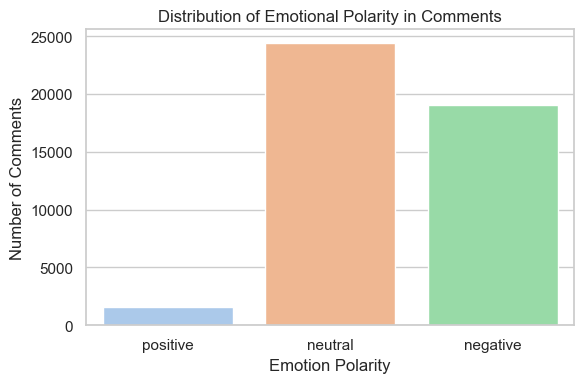

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_csv("comments_processing2.csv")
sns.set_theme(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='emotion_polarity', order=['positive','neutral','negative'],palette='pastel')
plt.title("Distribution of Emotional Polarity in Comments")
plt.xlabel("Emotion Polarity")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()




2. Proportion of comments that oppose the common polarity of the thread


C:\Users\abeba\AppData\Local\Temp\ipykernel_49884\3069171259.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=opposition_by_emotion, x='emotion_polarity', y='emotionally_oppositional', palette='muted')


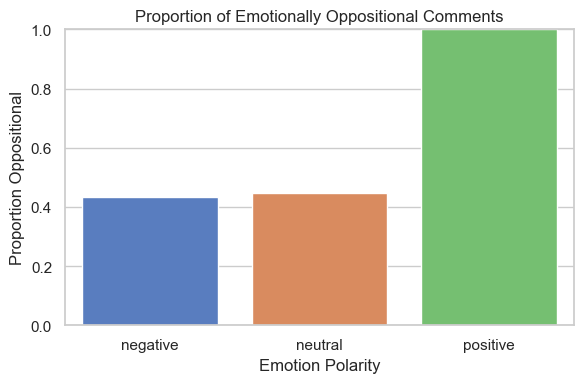

In [4]:
# calculate the percentage of opposition per polarity
opposition_by_emotion = df.groupby('emotion_polarity')['emotionally_oppositional'].mean().reset_index()

#Chart characteristice 
plt.figure(figsize=(6, 4))
sns.barplot(data=opposition_by_emotion, x='emotion_polarity', y='emotionally_oppositional', palette='muted')
plt.title("Proportion of Emotionally Oppositional Comments")
plt.xlabel("Emotion Polarity")
plt.ylabel("Proportion Oppositional")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

3. Proportion of comments that have opposing polarity to their corresponding root comment


C:\Users\abeba\AppData\Local\Temp\ipykernel_49884\3916787077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=parent_opposing, x='emotion_polarity', y='emotionally_opposed_to_parent', palette='deep')


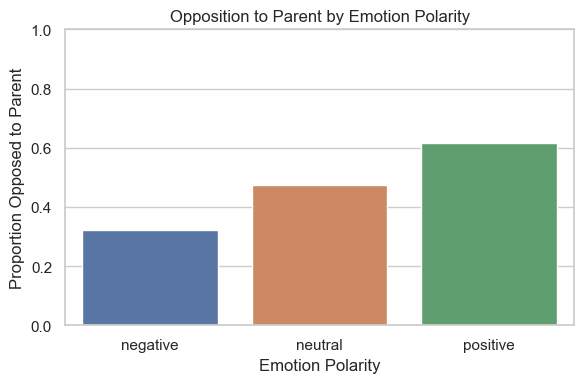

In [8]:
parent_opposing = df.groupby('emotion_polarity')['emotionally_opposed_to_parent'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=parent_opposing, x='emotion_polarity', y='emotionally_opposed_to_parent', palette='deep')
plt.title("Opposition to Parent by Emotion Polarity")
plt.xlabel("Emotion Polarity")
plt.ylabel("Proportion Opposed to Parent")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

4. Emotion Polarity Transitions


In [9]:
# Create parent-child emotion polarity pairs
df_parent_child = df[df['parent_id'].notna()].copy()
df_parent_child['parent_emotion'] = df_parent_child['parent_id'].map(id_to_emotion_polarity)

# Crosstab of transitions
transition_matrix = pd.crosstab(df_parent_child['parent_emotion'], df_parent_child['emotion_polarity'], normalize='index')

plt.figure(figsize=(6, 5))
sns.heatmap(transition_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Emotion Polarity Transition Matrix (Parent → Child)")
plt.xlabel("Reply Emotion Polarity")
plt.ylabel("Parent Emotion Polarity")
plt.tight_layout()
plt.show()


NameError: name 'id_to_emotion_polarity' is not defined